# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [39]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures
from patsy import dmatrices
from sklearn.linear_model import LinearRegression



import patsy


In [2]:
tips_df = sns.load_dataset("tips")
tips_df['tip_pct'] = tips_df['tip'] / (tips_df['total_bill'] - tips_df['tip'])
tips_df['net_bill'] = tips_df['total_bill'] - tips_df['tip']
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   tip_pct     244 non-null    float64 
 8   net_bill    244 non-null    float64 
dtypes: category(4), float64(4), int64(1)
memory usage: 11.2 KB


In [9]:
formula = 'tip ~ sex + smoker + time + net_bill'

y, X = patsy.dmatrices(formula, tips_df, return_type='dataframe')

y.head(), X.head()

(    tip
 0  1.01
 1  1.66
 2  3.50
 3  3.31
 4  3.61,
    Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
 0        1.0            1.0           1.0             1.0     15.98
 1        1.0            0.0           1.0             1.0      8.68
 2        1.0            0.0           1.0             1.0     17.51
 3        1.0            0.0           1.0             1.0     20.37
 4        1.0            1.0           1.0             1.0     20.98)

In [16]:
modelo = sm.OLS(y, X)
resultados = modelo.fit()

resultados.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 06 May 2024   Prob (F-statistic):           2.64e-20
Time:                        21:43:21   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Variáveis com p-valores altos (geralmente maiores que 0,05) são frequentemente consideradas não significativas.

In [15]:
nova_formula = 'tip ~ net_bill'

y_novo, X_novo = patsy.dmatrices(nova_formula, tips_df, return_type='dataframe')

X_novo.head()

,Intercept,net_bill
0,1.0,15.98
1,1.0,8.68
2,1.0,17.51
3,1.0,20.37
4,1.0,20.98


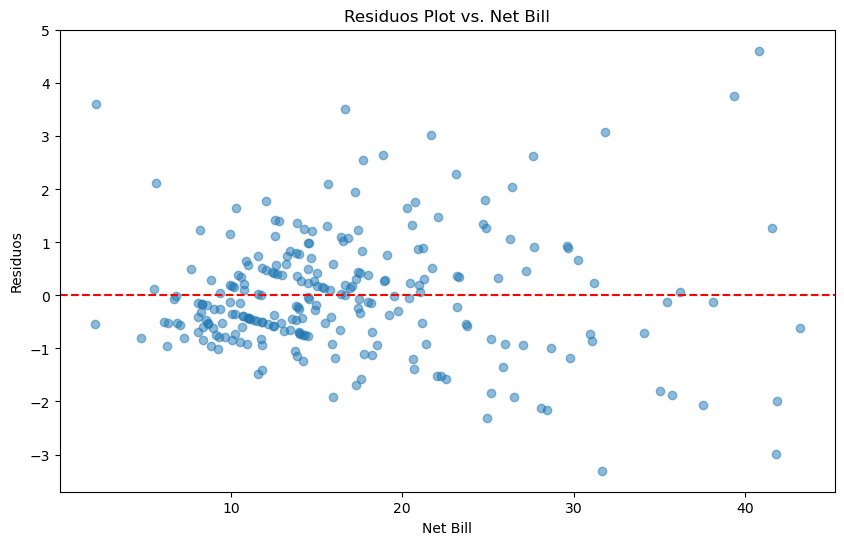

In [17]:
modelo_novo = sm.OLS(y_novo, X_novo)
resultados_novos = modelo_novo.fit()

# Calcular os resíduos
residuos = resultados_novos.resid

# Gráfico de resíduos
plt.figure(figsize=(10, 6))
plt.scatter(X_novo['net_bill'], residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Net Bill')
plt.ylabel('Residuos')
plt.title('Residuos Plot vs. Net Bill')
plt.show()


In [20]:
tips_df['log_net_bill'] = np.log(tips_df['net_bill'])
tips_df['net_bill_squared'] = tips_df['net_bill'] ** 2

# Formula para o modelo logarítmico
formula_log = 'tip ~ log_net_bill'

# Formula para o modelo polinomial
formula_poli = 'tip ~ net_bill + I(net_bill ** 2)'

# Criando as matrizes para ambos modelos
y_log, X_log = patsy.dmatrices(formula_log, tips_df, return_type='dataframe')
y_poli, X_poli = patsy.dmatrices(formula_poli, tips_df, return_type='dataframe')

# Ajustando os modelos
modelo_log = sm.OLS(y_log, X_log)
resultado_log = modelo_log.fit()

modelo_poli = sm.OLS(y_poli, X_poli)
resultado_poli = modelo_poli.fit()

# Resumo dos modelos para comparação
resultado_log.summary(), resultado_poli.summary()


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    tip   R-squared:                       0.294
 Model:                            OLS   Adj. R-squared:                  0.292
 Method:                 Least Squares   F-statistic:                     101.0
 Date:                Mon, 06 May 2024   Prob (F-statistic):           4.40e-20
 Time:                        21:49:07   Log-Likelihood:                -382.40
 No. Observations:                 244   AIC:                             768.8
 Df Residuals:                     242   BIC:                             775.8
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------------

Ambos os modelos mostram melhorias em relação ao modelo linear simples, mas o modelo polinomial apresenta um R-quadrado ajustado ligeiramente superior, indicando que ele pode ser o melhor modelo entre os dois.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [24]:
formula = 'tip_pct ~ sex + smoker + time + net_bill'

y, X = dmatrices(formula, tips_df, return_type='dataframe')

y.head(), X.head()

(    tip_pct
 0  0.063204
 1  0.191244
 2  0.199886
 3  0.162494
 4  0.172069,
    Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
 0        1.0            1.0           1.0             1.0     15.98
 1        1.0            0.0           1.0             1.0      8.68
 2        1.0            0.0           1.0             1.0     17.51
 3        1.0            0.0           1.0             1.0     20.37
 4        1.0            1.0           1.0             1.0     20.98)

In [27]:
modelo = sm.OLS(y, X).fit()

modelo_summary = modelo.summary()
modelo_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.157
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.85e-05
Time:                        21:57:30   Log-Likelihood:                 110.12
No. Observations:                 244   AIC:                            -210.2
Df Residuals:                     239   BIC:                            -192.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3216      0.033      9.698      0.000       0.256       0.387
sex[T.Female]     -0.0069      0.021     -0.321      0.749      -0.049       0.035
smoker[T.No]      -0.0351      0.021     -1.700      0.090      -0.076       0.006
time[T.Dinner]     0.0221      0.023      0.961      0.337      -0.023       0.067
net_bill          -0.0066      0.001     -5.191      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      461.972   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218184.236
Skew:                          10.789   Prob(JB):                         0.00
Kurtosis:                     147.897   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

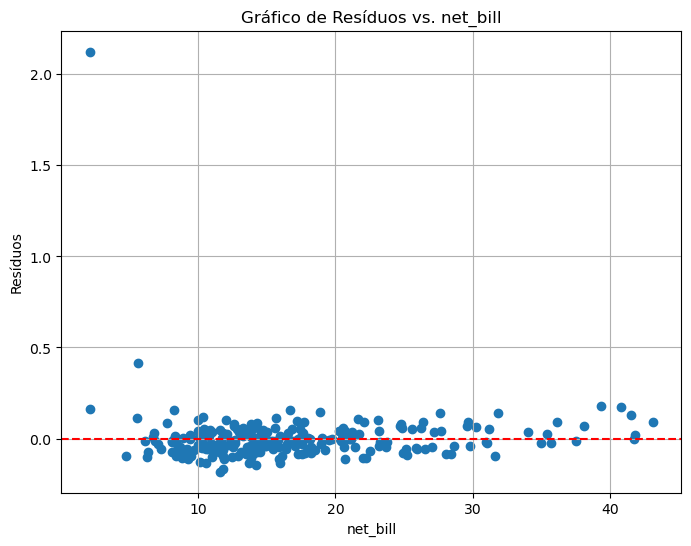

In [29]:
modelo_ajustado = sm.OLS(y, X).fit()

# Obter os resíduos do modelo atualizado
residuos = modelo_ajustado.resid

# Plotar os resíduos em função da variável net_bill
plt.figure(figsize=(8, 6))
plt.scatter(X['net_bill'], residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. net_bill')
plt.grid(True)
plt.show()


In [32]:
# Adicionar colunas transformadas para net_bill: logaritmo e polinômio de segundo grau
tips_df['log_net_bill'] = np.log(tips_df['net_bill'])
tips_df['net_bill_squared'] = tips_df['net_bill'] ** 2

# Criar as matrizes de design e resposta para os modelos transformados
y_log, X_log = dmatrices('tip_pct ~ smoker + log_net_bill', data=tips_df, return_type='dataframe')
y_poli, X_poli = dmatrices('tip_pct ~ smoker + net_bill + net_bill_squared', data=tips_df, return_type='dataframe')

# Ajustar os modelos
modelo_log = sm.OLS(y_log, X_log).fit()
modelo_poli = sm.OLS(y_poli, X_poli).fit()

# Obter sumários dos modelos
modelo_log_summary = modelo_log.summary()
modelo_poli_summary = modelo_poli.summary()

modelo_log_summary, modelo_poli_summary


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                tip_pct   R-squared:                       0.211
 Model:                            OLS   Adj. R-squared:                  0.204
 Method:                 Least Squares   F-statistic:                     32.17
 Date:                Mon, 06 May 2024   Prob (F-statistic):           4.13e-13
 Time:                        22:09:11   Log-Likelihood:                 125.19
 No. Observations:                 244   AIC:                            -244.4
 Df Residuals:                     241   BIC:                            -233.9
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------------

Comparando os dois modelos, o modelo com o logaritmo de net_bill possui um R² ajustado mais alto e, portanto, explica uma porcentagem maior da variância em tip_pct em comparação com o modelo polinomial

O R-quadrado ajustado para o modelo final com o logaritmo de net_bill é aproximadamente 0.204, enquanto o R-quadrado ajustado do modelo inicial (antes da remoção de variáveis e transformações) é cerca de 0.092.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [37]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [40]:
df_limpo = df[['renda', 'tempo_emprego']].dropna()

X = df_limpo[['tempo_emprego']].values
y = df_limpo['renda'].values

modelo = LinearRegression()
modelo.fit(X, y)

coef = modelo.coef_[0]
intercept = modelo.intercept_

r_quadrado = modelo.score(X, y)

coef, intercept, r_quadrado


(283.350852123226, 2653.945346074583, 0.15542139607044092)

Isso significa que a equação do modelo seria: renda = 283.35 x tempo_emprego + 2653.95

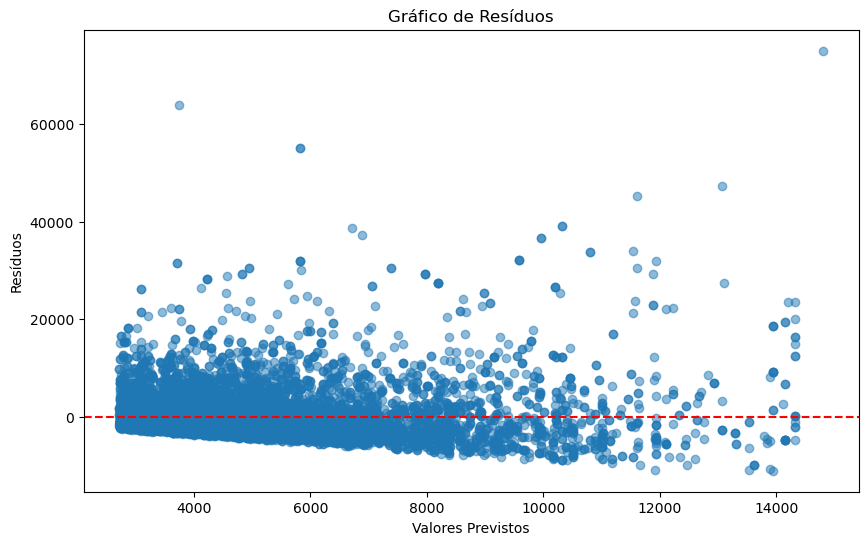

E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


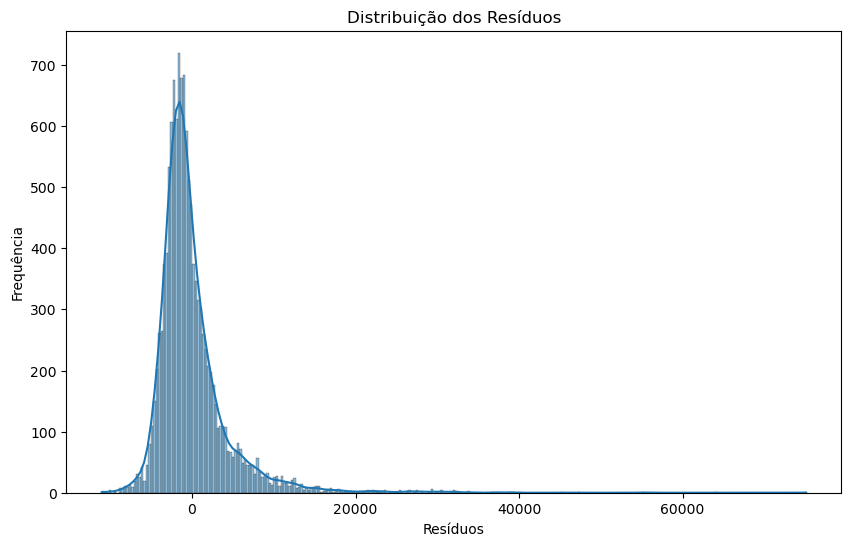

In [41]:
y_pred = modelo.predict(X)

# Residuals
residuos = y - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()

# Plotting distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()


Os resíduos não parecem ser distribuídos aleatoriamente ao redor da linha zero, sugerindo que o modelo pode não estar capturando toda a variabilidade dos dados. Há uma tendência visível no gráfico, o que pode indicar que o modelo é insuficiente ou inadequado para os dados.

A distribuição dos resíduos apresenta uma leve assimetria à direita, o que pode indicar a presença de outliers ou que a distribuição da variável resposta não é normal, afetando a performance do modelo linear.

In [44]:
columns = [
    'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
    'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia',
    'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'mau'
]

df_mult = df[columns + ['renda']].dropna()

df_mult_ajustada = pd.get_dummies(df_mult, drop_first=True)

# Extracting predictors and response variable
X_mult = df_mult_ajustada.drop('renda', axis=1).values
y_mult = np.log1p(df_mult_ajustada['renda'].values)

# Creating and fitting the linear regression model
modelo_mult = LinearRegression()
modelo_mult.fit(X_mult, y_mult)

intercepto_mult = modelo_mult.intercept_
coef_mult = modelo_mult.coef_
r_quadrado_mult = modelo_mult.score(X_mult, y_mult)

intercepto_mult, coef_mult, r_quadrado_mult

(7.201375380444488,
 array([-0.00144291,  0.08470918,  0.00469217,  0.00516842,  0.04819342,
         0.01142372, -0.03227844,  0.48131447, -0.04987258,  0.17862441,
         0.40971931,  0.09486634,  0.54936374,  0.01655125,  0.1133865 ,
        -0.00897005, -0.03952183,  0.02131125, -0.025588  , -0.03764666,
         0.01460357, -0.05780423,  0.05701966, -0.10931909, -0.05676078]),
 0.24185382214744688)

Log Transformação: O uso da transformação logarítmica ajuda a normalizar a distribuição dos resíduos, tornando os resultados do modelo mais robustos.